## Predicting temprature

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
df= pd.read_csv('Updated_algerianffd.csv')

In [73]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [75]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region


In [76]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [77]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [78]:
df_copy = df.drop(['day','month','year'],axis=1)


In [79]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [80]:
df_copy['Classes']=np.where(df_copy['Classes'].str.contains("not fire"),0,1)

In [81]:
df.head(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0


In [82]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
242,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


In [83]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [84]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [85]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

In [86]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

Text(0.5, 1.0, 'Fire analysis of sidi-bel region')

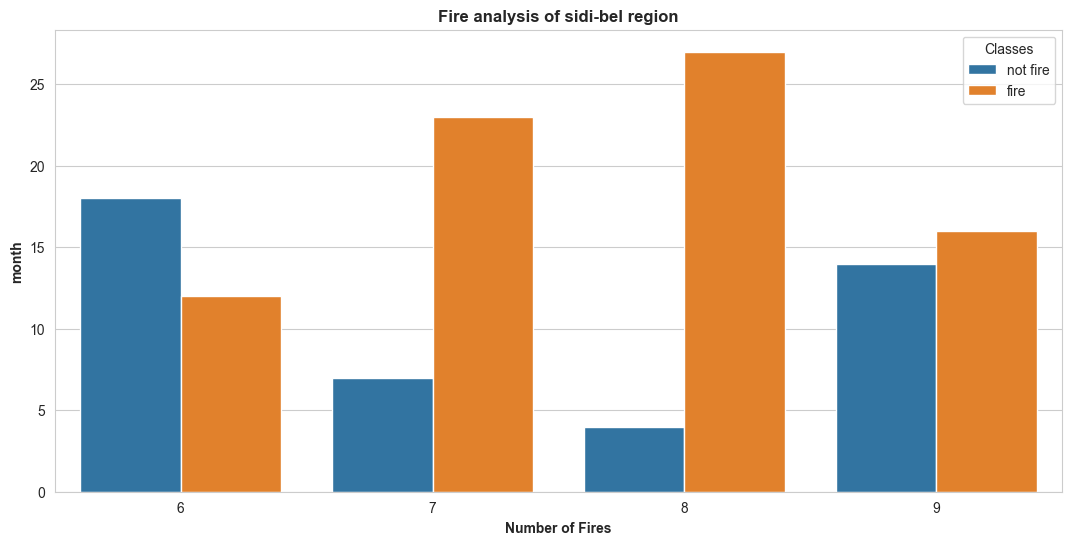

In [87]:
#Monthly fire analysis
dftemp = df.loc[df['region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=dftemp)
plt.xlabel('Number of Fires',weight='bold')
plt.ylabel('month',weight='bold')
plt.title('Fire analysis of sidi-bel region',weight='bold')

Text(0.5, 1.0, 'Fire analysis of other region')

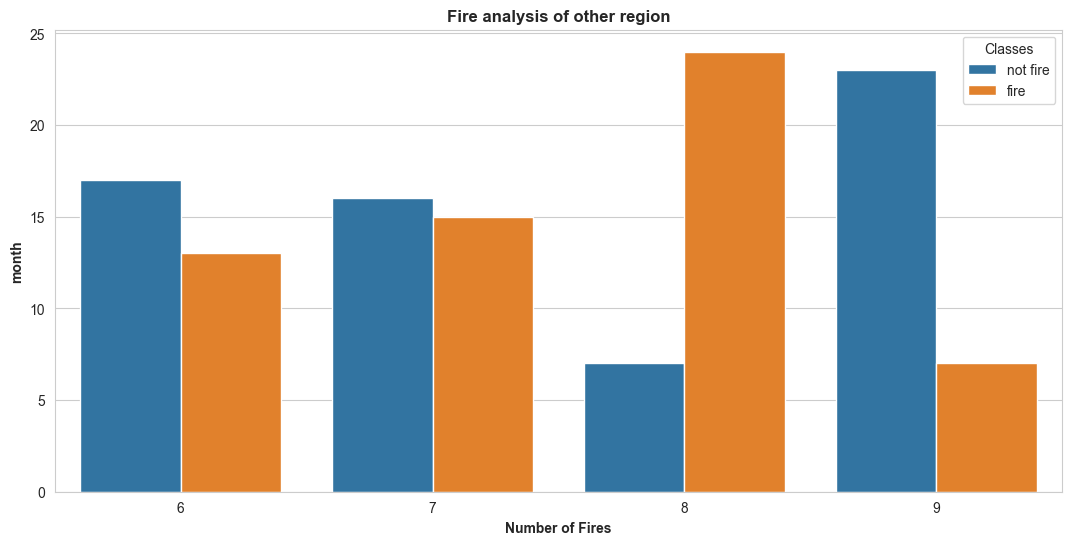

In [88]:
#Monthly fire analysis
dftemp2 = df.loc[df['region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=dftemp2)
plt.xlabel('Number of Fires',weight='bold')
plt.ylabel('month',weight='bold')
plt.title('Fire analysis of other region',weight='bold')

In [89]:
df_copy.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0


In [90]:
# assigning value to dependent and indipendent features
y= df_copy['Temperature']
x = df_copy.drop('Temperature',axis=1)

In [91]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [92]:
def correlation_col(data,theresold):
    col_corr= set()
    col_matrix=data.corr()
    for i in range(len(col_matrix.columns)):
        for j in range(i):
            if abs(col_matrix.iloc[i,j])>theresold:
                colname = col_matrix.columns[i]
                col_corr.add(colname)
                
    return col_corr



In [93]:
corr_features = correlation_col(x_train,0.85)

In [94]:
x_train.drop(corr_features,inplace=True,axis=1)
x_test.drop(corr_features,inplace=True,axis=1)

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Text(0.5, 1.0, 'After scaling')

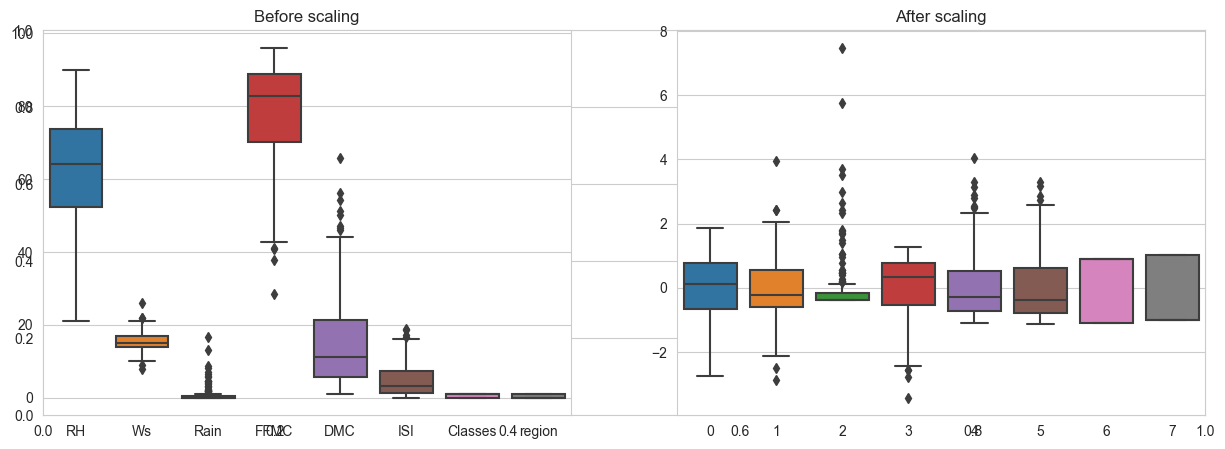

In [96]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title("Before scaling")

plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title("After scaling")

2.0727716296760104
0.18479341127922178


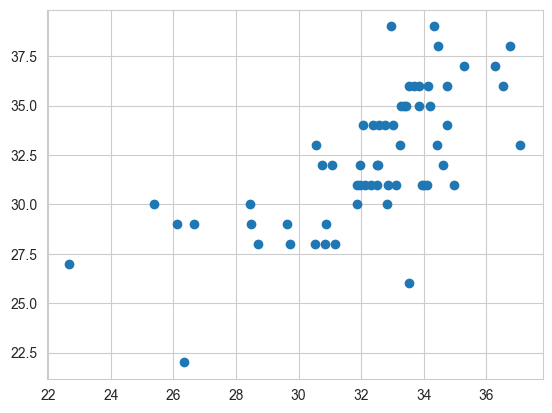

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

slr= LinearRegression()
slr.fit(x_train_scaled,y_train)
y_pred= slr.predict(x_test_scaled)
mae= mean_absolute_error(y_pred,y_test)
lrscore = r2_score(y_pred,y_test)
print(mae)
print(lrscore)
plt.scatter(y_pred,y_test)

2.133660267664301
-1.51995753689045


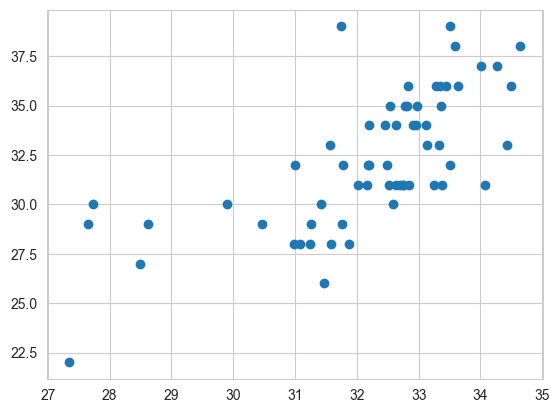

In [98]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score

llr= Lasso()
llr.fit(x_train_scaled,y_train)
y_pred= llr.predict(x_test_scaled)
mae= mean_absolute_error(y_pred,y_test)
lrscore = r2_score(y_pred,y_test)
print(mae)
print(lrscore)
plt.scatter(y_pred,y_test)

2.069150846133556
0.18083091069042856


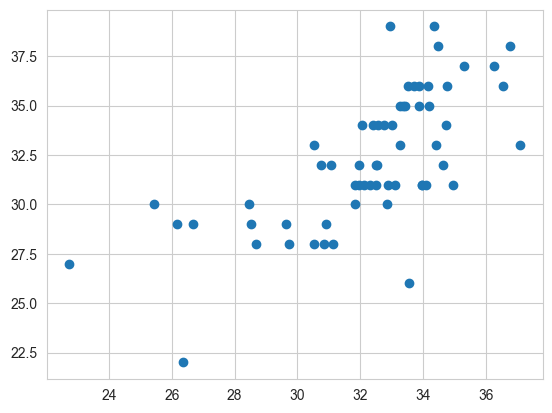

In [99]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score

rlr= Ridge()
rlr.fit(x_train_scaled,y_train)
y_pred= rlr.predict(x_test_scaled)
mae= mean_absolute_error(y_pred,y_test)
lrscore = r2_score(y_pred,y_test)
print(mae)
print(lrscore)
plt.scatter(y_pred,y_test)

2.0437711479844483
-1.1149012757797343


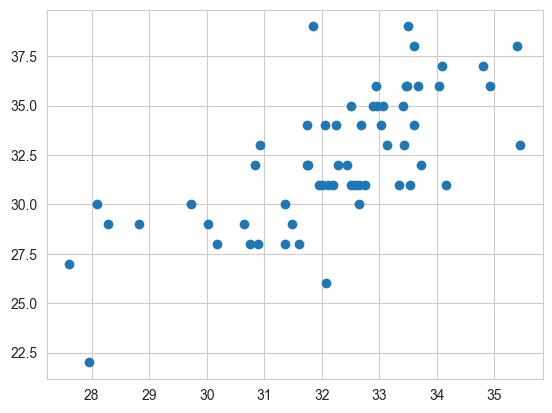

In [100]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score

elr= ElasticNet()
elr.fit(x_train_scaled,y_train)
y_pred= elr.predict(x_test_scaled)
mae= mean_absolute_error(y_pred,y_test)
lrscore = r2_score(y_pred,y_test)
print(mae)
print(lrscore)
plt.scatter(y_pred,y_test)

2.035361215917868
0.16730337228466496


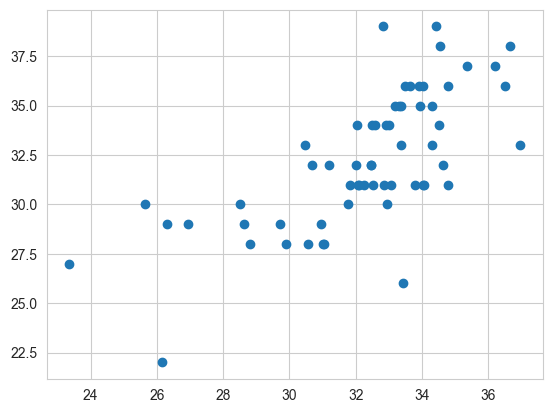

In [106]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error,r2_score

lrcv= LassoCV(cv=15)
lrcv.fit(x_train_scaled,y_train)
y_pred= lrcv.predict(x_test_scaled)
mae= mean_absolute_error(y_pred,y_test)
lrscore = r2_score(y_pred,y_test)
print(mae)
print(lrscore)
plt.scatter(y_pred,y_test)